In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

DATASET_PATH = PWD + '/data/dataset/dataset.pkl'
IMAGES_DIR = PWD + '/data/images/cfd_visualisation/'

import pickle

import numpy as np
from matplotlib import pyplot as plt
from src.utils import save_plt

In [2]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

In [3]:
N_BASELINE = 6

## Utils

In [4]:
x_time = np.arange(0, 24 / 7.695, 1 / 7.695)

def show_waveform(waveform, init=True, legend=False, font_size=9, **kwargs):
    if init:
        plt.figure(figsize=(6, 4))
        plt.rc('font', size=font_size)
    plt.plot(x_time, waveform, marker='.', linewidth=1, markersize=5, **kwargs)
    if init:
        plt.ylim(-0.05, 1.05)
        plt.xlabel('time [ns]')
        plt.ylabel('voltage [V]')
        plt.grid()
    if legend:
        plt.legend()

## Step 0. Visualise

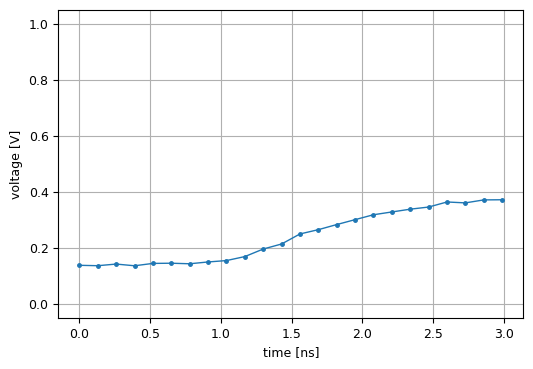

In [5]:
waveform = dataset[(2, 11)][0][500]

show_waveform(waveform)
plt.show()

## Step 1. Baseline subtraction

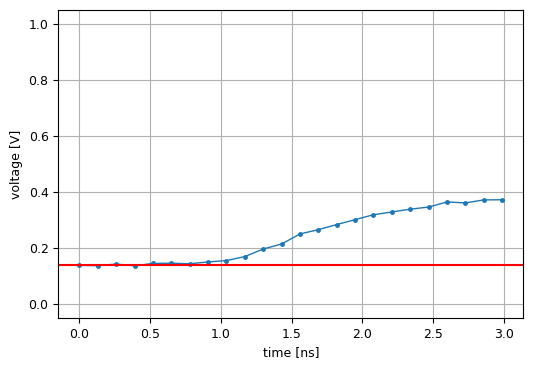

In [6]:
baseline = np.mean(waveform[:N_BASELINE])

show_waveform(waveform)
plt.axhline(baseline, c='red')
plt.show()

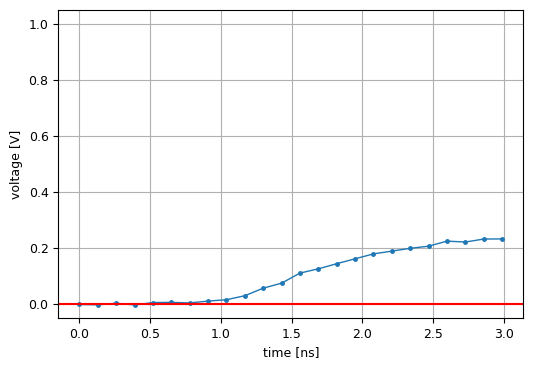

In [7]:
waveform_baseline = waveform - baseline

show_waveform(waveform_baseline)
plt.axhline(0, c='red')
plt.show()

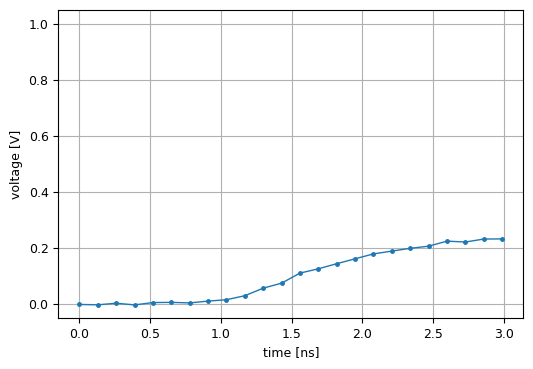

In [8]:
waveform_baseline = waveform - baseline

show_waveform(waveform_baseline)
plt.show()

## Step 2. Normalisation

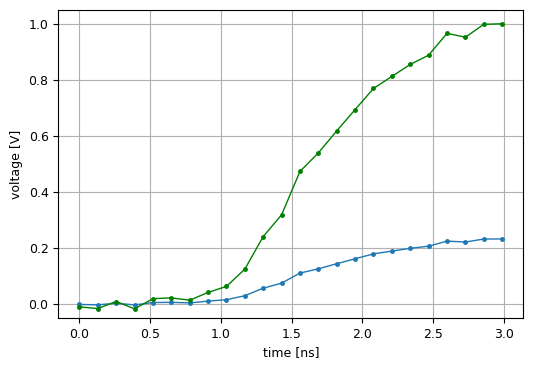

In [9]:
waveform_norm = waveform_baseline / np.max(waveform_baseline)

show_waveform(waveform_baseline)
show_waveform(waveform_norm, init=False, c='green')
plt.show()

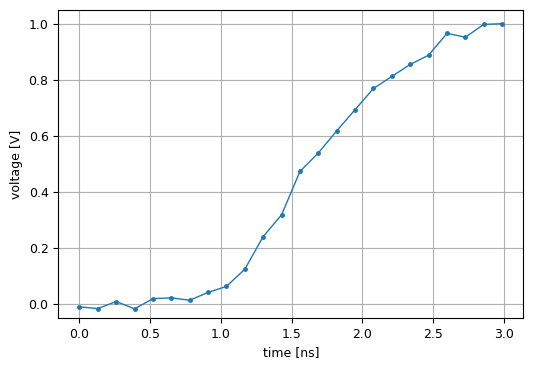

In [10]:
show_waveform(waveform_norm)

## Step 3. Fixed threshold

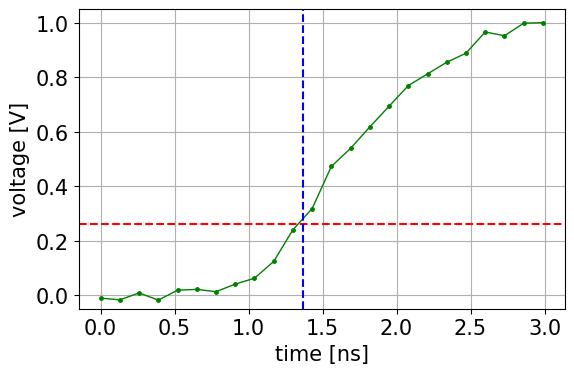

In [11]:
show_waveform(waveform_norm, c='green', font_size=15)

plt.axhline(0.26, c='red', linestyle='--')
plt.axvline(1.365, c='blue', linestyle='--')

plt.tight_layout()
save_plt(IMAGES_DIR + 'cfd_threshold.pdf')
plt.show()

## Together

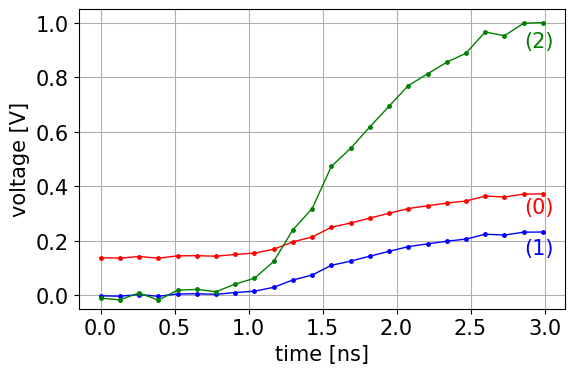

In [12]:
show_waveform(waveform, init=True, c='red', label='default', font_size=15)
show_waveform(waveform_baseline, init=False, c='blue', label='baseline subtracted')
show_waveform(waveform_norm, init=False, legend=False, c='green', label='normalised')

plt.text(2.86, 0.3, '(0)', c='red', fontsize=15)
plt.text(2.86, 0.15, '(1)', c='blue', fontsize=15)
plt.text(2.86, 0.91, '(2)', c='green', fontsize=15)

plt.tight_layout()
save_plt(IMAGES_DIR + 'cfd_together.pdf')
plt.show()

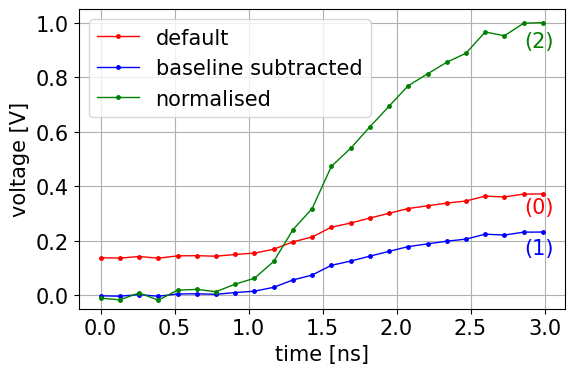

In [13]:
show_waveform(waveform, init=True, c='red', label='default', font_size=15)
show_waveform(waveform_baseline, init=False, c='blue', label='baseline subtracted')
show_waveform(waveform_norm, init=False, legend=True, c='green', label='normalised')

plt.text(2.86, 0.3, '(0)', c='red', fontsize=15)
plt.text(2.86, 0.15, '(1)', c='blue', fontsize=15)
plt.text(2.86, 0.91, '(2)', c='green', fontsize=15)

plt.tight_layout()
# save_plt(IMAGES_DIR + 'cfd_together_legend.pdf')
plt.show()